In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import datetime as dt
from tqdm import tqdm
import re

In [2]:
_dir = '_19'
_file_ls = os.listdir(_dir)
_file_ls[:3]

['_1901_freezer_log.csv', '_1901_suhp_log.csv', '_1901_suth_log.csv']

In [3]:
_suth_16_id = [290, 293, 296, 299]
_freezer_16_id = [308, 314, 320, 326]

In [4]:
# 1901
freez1 = pd.read_csv(os.path.join(_dir, _file_ls[0]))
suth1 = pd.read_csv(os.path.join(_dir, _file_ls[2]))

In [5]:
sensor_16 = pd.concat([suth1[suth1['equip_sensor_id'] == id] for id in _suth_16_id]).reset_index(drop=True)
freezer_16 = pd.concat([freez1[freez1['equip_sensor_id'] == id] for id in _freezer_16_id]).reset_index(drop=True)

sensor_16['gw_time'] = pd.to_datetime(sensor_16['gw_time'])
freezer_16['gw_time'] = pd.to_datetime(freezer_16['gw_time'])

In [6]:
freezer_16['key'] = [i for i in range(len(freezer_16))]
sensor_16['key'] = None

# 방법 1

In [7]:
def time_mapping(sensor, freezer):
    for i in tqdm(range(len(freezer))):
        sensor.loc[(sensor['gw_time'] - freezer.iloc[i]['gw_time'] <= dt.timedelta(seconds = 30))&(sensor['gw_time'] - freezer.iloc[i]['gw_time'] > dt.timedelta(seconds = 0)), 'key'] = freezer.iloc[i]['key']
    df = pd.merge(freezer, sensor, how = 'inner', on = 'key').sort_values(by = 'key')
    col = ['key', 'gw_time_x', 'gw_time_y'] + [i for i in df.columns if i not in ['key', 'gw_time_x', 'gw_time_y']]
    df = df[col]
    return df

In [8]:
_data = []
for _id in freezer_16['equip_sensor_id'].unique():
    _tmp = time_mapping(sensor_16, freezer_16[freezer_16['equip_sensor_id']==_id])
    _data.append(_tmp)

100%|██████████| 7023/7023 [00:05<00:00, 1247.22it/s]


In [9]:
df = pd.concat(_data)

In [10]:
df.loc[df['gw_time_y'] - df['gw_time_x'] > dt.timedelta(seconds = 30)]

,key,gw_time_x,gw_time_y,equip_sensor_id_x,status_x,fan_run,fan_trip,freez_run,freez_trip,defrost,...,equip_sensor_id_y,status_y,color_list,avg_temperature,avg_humidity,temperature,humidity,battery,available,insert_dt_y


In [11]:
tmp = df.sort_values(by='gw_time_x')[['key','gw_time_x', 'gw_time_y', 'equip_sensor_id_x', 'equip_sensor_id_y']].reset_index(drop=True)

In [12]:
tmp.sort_values(by='key')

,key,gw_time_x,gw_time_y,equip_sensor_id_x,equip_sensor_id_y
0,2910,2019-01-30 13:42:32,2019-01-30 13:42:52,308,290
15,2910,2019-01-30 13:42:32,2019-01-30 13:42:52,308,299
14,2910,2019-01-30 13:42:32,2019-01-30 13:42:52,308,296
13,2910,2019-01-30 13:42:32,2019-01-30 13:42:52,308,293
41,2911,2019-01-30 13:43:02,2019-01-30 13:43:22,308,296
...,...,...,...,...,...
64329,28090,2019-01-31 23:59:19,2019-01-31 23:59:22,326,293
64337,28091,2019-01-31 23:59:49,2019-01-31 23:59:52,326,293
64342,28091,2019-01-31 23:59:49,2019-01-31 23:59:52,326,290
64336,28091,2019-01-31 23:59:49,2019-01-31 23:59:52,326,296


In [13]:
tmp[tmp['equip_sensor_id_x']==308][:12]

,key,gw_time_x,gw_time_y,equip_sensor_id_x,equip_sensor_id_y
0,2910,2019-01-30 13:42:32,2019-01-30 13:42:52,308,290
13,2910,2019-01-30 13:42:32,2019-01-30 13:42:52,308,293
14,2910,2019-01-30 13:42:32,2019-01-30 13:42:52,308,296
15,2910,2019-01-30 13:42:32,2019-01-30 13:42:52,308,299
18,2911,2019-01-30 13:43:02,2019-01-30 13:43:30,308,293
22,2911,2019-01-30 13:43:02,2019-01-30 13:43:22,308,290
23,2911,2019-01-30 13:43:02,2019-01-30 13:43:30,308,290
24,2911,2019-01-30 13:43:02,2019-01-30 13:43:22,308,293
38,2911,2019-01-30 13:43:02,2019-01-30 13:43:30,308,299
39,2911,2019-01-30 13:43:02,2019-01-30 13:43:22,308,299


In [14]:
tmp[tmp['equip_sensor_id_x']==308][12:24]

,key,gw_time_x,gw_time_y,equip_sensor_id_x,equip_sensor_id_y
59,2912,2019-01-30 13:43:32,2019-01-30 13:44:00,308,299
61,2912,2019-01-30 13:43:32,2019-01-30 13:44:00,308,296
62,2912,2019-01-30 13:43:32,2019-01-30 13:44:00,308,290
63,2912,2019-01-30 13:43:32,2019-01-30 13:44:00,308,293
66,2913,2019-01-30 13:44:02,2019-01-30 13:44:31,308,299
67,2913,2019-01-30 13:44:02,2019-01-30 13:44:31,308,296
68,2913,2019-01-30 13:44:02,2019-01-30 13:44:31,308,293
69,2913,2019-01-30 13:44:02,2019-01-30 13:44:31,308,290
84,2914,2019-01-30 13:44:33,2019-01-30 13:45:01,308,299
85,2914,2019-01-30 13:44:33,2019-01-30 13:45:01,308,296


In [15]:
sensor_16[sensor_16['equip_sensor_id']==293][6:]

,equip_sensor_id,gw_time,status,color_list,avg_temperature,avg_humidity,temperature,humidity,battery,available,insert_dt,key
4073,293,2019-01-30 13:42:52,0,"{""humidity"": ""green"", ""temperature"": ""red"", ""t...",-1.59,14.74,-3.14,31.03,100,1,2019-01-30 13:42:52,23979
4074,293,2019-01-30 13:43:22,0,"{""humidity"": ""green"", ""temperature"": ""red"", ""t...",-2.58,23.05,-3.15,31.09,100,1,2019-01-30 13:43:22,23980
4075,293,2019-01-30 13:43:30,0,"{""humidity"": ""green"", ""temperature"": ""red"", ""t...",-2.61,23.36,-3.15,31.13,100,1,2019-01-30 13:43:30,23980
4076,293,2019-01-30 13:44:00,0,"{""humidity"": ""green"", ""temperature"": ""red"", ""t...",-2.60,23.41,-3.15,31.23,100,1,2019-01-30 13:44:01,23981
4077,293,2019-01-30 13:44:31,0,"{""humidity"": ""green"", ""temperature"": ""red"", ""t...",-2.58,23.43,-3.15,31.26,100,1,2019-01-30 13:44:31,23982
...,...,...,...,...,...,...,...,...,...,...,...,...
8129,293,2019-01-31 23:57:51,0,"{""humidity"": ""green"", ""temperature"": ""red"", ""t...",0.03,20.97,-0.66,21.29,100,1,2019-01-31 23:57:51,28087
8130,293,2019-01-31 23:58:21,0,"{""humidity"": ""green"", ""temperature"": ""red"", ""t...",0.04,21.00,-0.65,21.32,100,1,2019-01-31 23:58:21,28088
8131,293,2019-01-31 23:58:51,0,"{""humidity"": ""green"", ""temperature"": ""red"", ""t...",0.05,21.03,-0.65,21.36,100,1,2019-01-31 23:58:52,28089
8132,293,2019-01-31 23:59:22,0,"{""humidity"": ""green"", ""temperature"": ""red"", ""t...",0.05,21.03,-0.65,21.38,100,1,2019-01-31 23:59:22,28090


# 검증

In [13]:
freezer_16_308 = freezer_16[freezer_16['equip_sensor_id']==308]

In [20]:
freezer_16_308[freezer_16_308['gw_time']>pd.to_datetime('2019-01-30 13:41:52')]

,equip_sensor_id,gw_time,status,fan_run,fan_trip,freez_run,freez_trip,defrost,ctrl_mode,ctrl_operation,operation,run_time,insert_dt,key
2909,308,2019-01-30 13:42:21,1,0.0,0.0,0.0,0.0,1.0,0,1,1,822,2019-01-30 13:42:22,2909
2910,308,2019-01-30 13:42:32,1,0.0,0.0,0.0,0.0,1.0,0,1,1,822,2019-01-30 13:42:32,2910
2911,308,2019-01-30 13:43:02,1,0.0,0.0,0.0,0.0,1.0,0,1,1,823,2019-01-30 13:43:02,2911
2912,308,2019-01-30 13:43:32,1,0.0,0.0,0.0,0.0,1.0,0,1,1,823,2019-01-30 13:43:32,2912
2913,308,2019-01-30 13:44:02,1,0.0,0.0,0.0,0.0,1.0,0,1,1,824,2019-01-30 13:44:03,2913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7018,308,2019-01-31 23:57:48,1,1.0,0.0,0.0,0.0,0.0,0,1,1,1437,2019-01-31 23:57:48,7018
7019,308,2019-01-31 23:58:18,1,1.0,0.0,0.0,0.0,0.0,0,1,1,1438,2019-01-31 23:58:18,7019
7020,308,2019-01-31 23:58:48,1,1.0,0.0,0.0,0.0,0.0,0,1,1,1438,2019-01-31 23:58:49,7020
7021,308,2019-01-31 23:59:19,1,1.0,0.0,0.0,0.0,0.0,0,1,1,1439,2019-01-31 23:59:19,7021


In [18]:
sensor_16[5:]

,equip_sensor_id,gw_time,status,color_list,avg_temperature,avg_humidity,temperature,humidity,battery,available,insert_dt,key
5,290,2019-01-29 13:49:03,0,"{""humidity"": ""green"", ""temperature"": ""red"", ""t...",-1.85,25.79,-2.25,26.63,100,1,2019-01-29 13:49:03,None
6,290,2019-01-30 13:42:52,0,"{""humidity"": ""red"", ""temperature"": ""red"", ""tot...",-1.59,14.74,0.00,0.00,0,1,2019-01-30 13:42:52,23979
7,290,2019-01-30 13:43:22,0,"{""humidity"": ""green"", ""temperature"": ""red"", ""t...",-2.58,23.05,-3.96,33.17,100,1,2019-01-30 13:43:22,23980
8,290,2019-01-30 13:43:30,0,"{""humidity"": ""green"", ""temperature"": ""red"", ""t...",-2.61,23.36,-4.10,34.32,100,1,2019-01-30 13:43:30,23980
9,290,2019-01-30 13:44:00,0,"{""humidity"": ""green"", ""temperature"": ""red"", ""t...",-2.60,23.41,-4.08,34.37,100,1,2019-01-30 13:44:01,23981
...,...,...,...,...,...,...,...,...,...,...,...,...
16251,299,2019-01-31 23:57:51,3,"{""total_status"": ""grey""}",0.03,20.97,-99999.00,-99999.00,-99999,0,2019-01-31 23:57:51,28087
16252,299,2019-01-31 23:58:21,3,"{""total_status"": ""grey""}",0.04,21.00,-99999.00,-99999.00,-99999,0,2019-01-31 23:58:21,28088
16253,299,2019-01-31 23:58:51,3,"{""total_status"": ""grey""}",0.05,21.03,-99999.00,-99999.00,-99999,0,2019-01-31 23:58:52,28089
16254,299,2019-01-31 23:59:22,3,"{""total_status"": ""grey""}",0.05,21.03,-99999.00,-99999.00,-99999,0,2019-01-31 23:59:22,28090


In [21]:
freezer_16[freezer_16['key']==23979]

,equip_sensor_id,gw_time,status,fan_run,fan_trip,freez_run,freez_trip,defrost,ctrl_mode,ctrl_operation,operation,run_time,insert_dt,key
23979,326,2019-01-30 13:42:32,1,1.0,0.0,0.0,0.0,0.0,0,1,1,822,2019-01-30 13:42:32,23979


In [22]:
freezer_16.sort_values(by='gw_time')

,equip_sensor_id,gw_time,status,fan_run,fan_trip,freez_run,freez_trip,defrost,ctrl_mode,ctrl_operation,operation,run_time,insert_dt,key
0,308,2019-01-29 13:56:14,1,0.0,0.0,0.0,0.0,1.0,1,1,1,836,2019-01-29 13:56:15,0
14046,320,2019-01-29 13:56:14,1,1.0,0.0,1.0,0.0,0.0,1,1,1,836,2019-01-29 13:56:15,14046
21069,326,2019-01-29 13:56:14,1,1.0,0.0,0.0,0.0,0.0,1,1,1,836,2019-01-29 13:56:15,21069
7023,314,2019-01-29 13:56:14,1,1.0,0.0,0.0,0.0,0.0,1,1,1,836,2019-01-29 13:56:15,7023
1,308,2019-01-29 13:56:15,1,0.0,0.0,0.0,0.0,1.0,1,1,1,836,2019-01-29 13:56:15,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7021,308,2019-01-31 23:59:19,1,1.0,0.0,0.0,0.0,0.0,0,1,1,1439,2019-01-31 23:59:19,7021
14045,314,2019-01-31 23:59:49,1,1.0,0.0,0.0,0.0,0.0,0,1,1,1439,2019-01-31 23:59:49,14045
7022,308,2019-01-31 23:59:49,1,1.0,0.0,0.0,0.0,0.0,0,1,1,1439,2019-01-31 23:59:49,7022
21068,320,2019-01-31 23:59:49,1,1.0,0.0,0.0,0.0,0.0,0,1,1,1439,2019-01-31 23:59:49,21068


In [23]:
28092/4

7023.0

In [25]:
len(freezer_16['gw_time'].unique())

7023

In [26]:
len(sensor_16['gw_time'].unique())

4067

In [27]:
sensor_16.shape[0]/4

4064.0

In [33]:
sensor_16[sensor_16['equip_sensor_id']==290][5:]

,equip_sensor_id,gw_time,status,color_list,avg_temperature,avg_humidity,temperature,humidity,battery,available,insert_dt,key
5,290,2019-01-29 13:49:03,0,"{""humidity"": ""green"", ""temperature"": ""red"", ""t...",-1.85,25.79,-2.25,26.63,100,1,2019-01-29 13:49:03,None
6,290,2019-01-30 13:42:52,0,"{""humidity"": ""red"", ""temperature"": ""red"", ""tot...",-1.59,14.74,0.00,0.00,0,1,2019-01-30 13:42:52,23979
7,290,2019-01-30 13:43:22,0,"{""humidity"": ""green"", ""temperature"": ""red"", ""t...",-2.58,23.05,-3.96,33.17,100,1,2019-01-30 13:43:22,23980
8,290,2019-01-30 13:43:30,0,"{""humidity"": ""green"", ""temperature"": ""red"", ""t...",-2.61,23.36,-4.10,34.32,100,1,2019-01-30 13:43:30,23980
9,290,2019-01-30 13:44:00,0,"{""humidity"": ""green"", ""temperature"": ""red"", ""t...",-2.60,23.41,-4.08,34.37,100,1,2019-01-30 13:44:01,23981
...,...,...,...,...,...,...,...,...,...,...,...,...
4062,290,2019-01-31 23:57:51,0,"{""humidity"": ""green"", ""temperature"": ""red"", ""t...",0.03,20.97,-2.11,23.78,100,1,2019-01-31 23:57:51,28087
4063,290,2019-01-31 23:58:21,0,"{""humidity"": ""green"", ""temperature"": ""red"", ""t...",0.04,21.00,-2.11,23.84,100,1,2019-01-31 23:58:21,28088
4064,290,2019-01-31 23:58:51,0,"{""humidity"": ""green"", ""temperature"": ""red"", ""t...",0.05,21.03,-2.10,23.88,100,1,2019-01-31 23:58:52,28089
4065,290,2019-01-31 23:59:22,0,"{""humidity"": ""green"", ""temperature"": ""red"", ""t...",0.05,21.03,-2.09,23.86,100,1,2019-01-31 23:59:22,28090


In [34]:
sensor_16[sensor_16['equip_sensor_id']==293][5:]

,equip_sensor_id,gw_time,status,color_list,avg_temperature,avg_humidity,temperature,humidity,battery,available,insert_dt,key
4072,293,2019-01-29 13:49:03,0,"{""humidity"": ""green"", ""temperature"": ""red"", ""t...",-1.85,25.79,-1.45,24.95,100,1,2019-01-29 13:49:03,None
4073,293,2019-01-30 13:42:52,0,"{""humidity"": ""green"", ""temperature"": ""red"", ""t...",-1.59,14.74,-3.14,31.03,100,1,2019-01-30 13:42:52,23979
4074,293,2019-01-30 13:43:22,0,"{""humidity"": ""green"", ""temperature"": ""red"", ""t...",-2.58,23.05,-3.15,31.09,100,1,2019-01-30 13:43:22,23980
4075,293,2019-01-30 13:43:30,0,"{""humidity"": ""green"", ""temperature"": ""red"", ""t...",-2.61,23.36,-3.15,31.13,100,1,2019-01-30 13:43:30,23980
4076,293,2019-01-30 13:44:00,0,"{""humidity"": ""green"", ""temperature"": ""red"", ""t...",-2.60,23.41,-3.15,31.23,100,1,2019-01-30 13:44:01,23981
...,...,...,...,...,...,...,...,...,...,...,...,...
8129,293,2019-01-31 23:57:51,0,"{""humidity"": ""green"", ""temperature"": ""red"", ""t...",0.03,20.97,-0.66,21.29,100,1,2019-01-31 23:57:51,28087
8130,293,2019-01-31 23:58:21,0,"{""humidity"": ""green"", ""temperature"": ""red"", ""t...",0.04,21.00,-0.65,21.32,100,1,2019-01-31 23:58:21,28088
8131,293,2019-01-31 23:58:51,0,"{""humidity"": ""green"", ""temperature"": ""red"", ""t...",0.05,21.03,-0.65,21.36,100,1,2019-01-31 23:58:52,28089
8132,293,2019-01-31 23:59:22,0,"{""humidity"": ""green"", ""temperature"": ""red"", ""t...",0.05,21.03,-0.65,21.38,100,1,2019-01-31 23:59:22,28090


In [31]:
sensor_16[sensor_16['equip_sensor_id']==296]

,equip_sensor_id,gw_time,status,color_list,avg_temperature,avg_humidity,temperature,humidity,battery,available,insert_dt,key
8134,296,2019-01-30 13:42:52,0,"{""humidity"": ""green"", ""temperature"": ""red"", ""t...",-1.59,14.74,-3.21,27.93,100,1,2019-01-30 13:42:52,23979
8135,296,2019-01-30 13:43:22,0,"{""humidity"": ""green"", ""temperature"": ""red"", ""t...",-2.58,23.05,-3.21,27.96,100,1,2019-01-30 13:43:22,23980
8136,296,2019-01-30 13:43:30,0,"{""humidity"": ""green"", ""temperature"": ""red"", ""t...",-2.61,23.36,-3.20,27.98,100,1,2019-01-30 13:43:30,23980
8137,296,2019-01-30 13:44:00,0,"{""humidity"": ""green"", ""temperature"": ""red"", ""t...",-2.60,23.41,-3.17,28.04,100,1,2019-01-30 13:44:01,23981
8138,296,2019-01-30 13:44:31,0,"{""humidity"": ""green"", ""temperature"": ""red"", ""t...",-2.58,23.43,-3.10,28.04,100,1,2019-01-30 13:44:31,23982
...,...,...,...,...,...,...,...,...,...,...,...,...
12190,296,2019-01-31 23:57:51,0,"{""humidity"": ""yellow"", ""temperature"": ""red"", ""...",0.03,20.97,2.88,17.85,100,1,2019-01-31 23:57:51,28087
12191,296,2019-01-31 23:58:21,0,"{""humidity"": ""yellow"", ""temperature"": ""red"", ""...",0.04,21.00,2.88,17.85,100,1,2019-01-31 23:58:21,28088
12192,296,2019-01-31 23:58:51,0,"{""humidity"": ""yellow"", ""temperature"": ""red"", ""...",0.05,21.03,2.90,17.85,100,1,2019-01-31 23:58:52,28089
12193,296,2019-01-31 23:59:22,0,"{""humidity"": ""yellow"", ""temperature"": ""red"", ""...",0.05,21.03,2.90,17.85,100,1,2019-01-31 23:59:22,28090


In [32]:
sensor_16[sensor_16['equip_sensor_id']==299]

,equip_sensor_id,gw_time,status,color_list,avg_temperature,avg_humidity,temperature,humidity,battery,available,insert_dt,key
12195,299,2019-01-30 13:42:52,0,"{""humidity"": ""red"", ""temperature"": ""red"", ""tot...",-1.59,14.74,0.0,0.0,0,1,2019-01-30 13:42:52,23979
12196,299,2019-01-30 13:43:22,0,"{""humidity"": ""red"", ""temperature"": ""red"", ""tot...",-2.58,23.05,0.0,0.0,0,1,2019-01-30 13:43:22,23980
12197,299,2019-01-30 13:43:30,0,"{""humidity"": ""red"", ""temperature"": ""red"", ""tot...",-2.61,23.36,0.0,0.0,0,1,2019-01-30 13:43:30,23980
12198,299,2019-01-30 13:44:00,0,"{""humidity"": ""red"", ""temperature"": ""red"", ""tot...",-2.60,23.41,0.0,0.0,0,1,2019-01-30 13:44:01,23981
12199,299,2019-01-30 13:44:31,0,"{""humidity"": ""red"", ""temperature"": ""red"", ""tot...",-2.58,23.43,0.0,0.0,0,1,2019-01-30 13:44:31,23982
...,...,...,...,...,...,...,...,...,...,...,...,...
16251,299,2019-01-31 23:57:51,3,"{""total_status"": ""grey""}",0.03,20.97,-99999.0,-99999.0,-99999,0,2019-01-31 23:57:51,28087
16252,299,2019-01-31 23:58:21,3,"{""total_status"": ""grey""}",0.04,21.00,-99999.0,-99999.0,-99999,0,2019-01-31 23:58:21,28088
16253,299,2019-01-31 23:58:51,3,"{""total_status"": ""grey""}",0.05,21.03,-99999.0,-99999.0,-99999,0,2019-01-31 23:58:52,28089
16254,299,2019-01-31 23:59:22,3,"{""total_status"": ""grey""}",0.05,21.03,-99999.0,-99999.0,-99999,0,2019-01-31 23:59:22,28090


# 19.02

In [9]:
_dir = "_19"
_suth_16_id = [290, 293, 296, 299]
_freezer_16_id = [308, 314, 320, 326]

In [10]:
# 1901
freez = pd.read_csv(os.path.join(_dir, "_1902_freezer_log.csv"))
suth = pd.read_csv(os.path.join(_dir, "_1902_suth_log.csv"))

sensor_16 = pd.concat(
    [suth[suth["equip_sensor_id"] == id] for id in _suth_16_id]
).reset_index(drop=True)
freezer_16 = pd.concat(
    [freez[freez["equip_sensor_id"] == id] for id in _freezer_16_id]
).reset_index(drop=True)

sensor_16["gw_time"] = pd.to_datetime(sensor_16["gw_time"])
freezer_16["gw_time"] = pd.to_datetime(freezer_16["gw_time"])

freezer_16["key"] = [i for i in range(len(freezer_16))]
sensor_16["key"] = None


In [11]:
def time_mapping(sensor, freezer):
    for i in tqdm(range(len(freezer))):
        sensor.loc[
            (sensor["gw_time"] - freezer.iloc[i]["gw_time"] <= dt.timedelta(seconds=30))
            & (
                sensor["gw_time"] - freezer.iloc[i]["gw_time"] > dt.timedelta(seconds=0)
            ),
            "key",
        ] = freezer.iloc[i]["key"]
    df = pd.merge(freezer, sensor, how="inner", on="key").sort_values(by="key")
    col = ["key", "gw_time_x", "gw_time_y"] + [
        i for i in df.columns if i not in ["key", "gw_time_x", "gw_time_y"]
    ]
    df = df[col]
    return df


_data = []
for _id in freezer_16["equip_sensor_id"].unique():
    _tmp = time_mapping(sensor_16, freezer_16[freezer_16["equip_sensor_id"] == _id])
    _data.append(_tmp)

100%|██████████| 81099/81099 [18:10<00:00, 74.39it/s] 


In [12]:
df = pd.concat(_data)

In [18]:
# df = time_mapping(sensor_16, freezer_16[freezer_16["equip_sensor_id"] == 308])

100%|██████████| 81099/81099 [08:04<00:00, 167.22it/s]


In [13]:
print("##### check #####")
print(df.loc[df["gw_time_y"] - df["gw_time_x"] > dt.timedelta(seconds=30)])
print(
    df.sort_values(by="gw_time_x")[
        ["key", "gw_time_x", "gw_time_y", "equip_sensor_id_x", "equip_sensor_id_y"]
    ].reset_index(drop=True)[:12]
)


print("##### merge df #####")
for _id in _freezer_16_id:
    print(df[df["equip_sensor_id_x"] == _id].shape)


##### check #####
Empty DataFrame
Columns: [key, gw_time_x, gw_time_y, equip_sensor_id_x, status_x, fan_run, fan_trip, freez_run, freez_trip, defrost, ctrl_mode, ctrl_operation, operation, run_time, insert_dt_x, equip_sensor_id_y, status_y, color_list, avg_temperature, avg_humidity, temperature, humidity, battery, available, insert_dt_y]
Index: []

[0 rows x 25 columns]
       key           gw_time_x           gw_time_y  equip_sensor_id_x  \
0        0 2019-02-01 00:00:19 2019-02-01 00:00:22                308   
1    81099 2019-02-01 00:00:19 2019-02-01 00:00:22                314   
2    81099 2019-02-01 00:00:19 2019-02-01 00:00:22                314   
3   162198 2019-02-01 00:00:19 2019-02-01 00:00:22                320   
4   162198 2019-02-01 00:00:19 2019-02-01 00:00:22                320   
5   162198 2019-02-01 00:00:19 2019-02-01 00:00:22                320   
6   162198 2019-02-01 00:00:19 2019-02-01 00:00:22                320   
7    81099 2019-02-01 00:00:19 2019-02-01 0

In [14]:
df[df["equip_sensor_id_x"] == 308][['gw_time_x', 'gw_time_y', 'equip_sensor_id_x', 'equip_sensor_id_y']][:12]

,gw_time_x,gw_time_y,equip_sensor_id_x,equip_sensor_id_y
0,2019-02-01 00:00:19,2019-02-01 00:00:22,308,290
1,2019-02-01 00:00:19,2019-02-01 00:00:22,308,293
2,2019-02-01 00:00:19,2019-02-01 00:00:22,308,296
3,2019-02-01 00:00:19,2019-02-01 00:00:22,308,299
4,2019-02-01 00:00:49,2019-02-01 00:00:52,308,290
5,2019-02-01 00:00:49,2019-02-01 00:00:52,308,293
6,2019-02-01 00:00:49,2019-02-01 00:00:52,308,296
7,2019-02-01 00:00:49,2019-02-01 00:00:52,308,299
11,2019-02-01 00:01:19,2019-02-01 00:01:23,308,299
10,2019-02-01 00:01:19,2019-02-01 00:01:23,308,296


# Freezer 308

In [15]:
freezer_16_308 = df[df['equip_sensor_id_x']==308]

In [16]:
freezer_16_308[freezer_16_308['equip_sensor_id_y']==290]

,key,gw_time_x,gw_time_y,equip_sensor_id_x,status_x,fan_run,fan_trip,freez_run,freez_trip,defrost,...,equip_sensor_id_y,status_y,color_list,avg_temperature,avg_humidity,temperature,humidity,battery,available,insert_dt_y
0,0,2019-02-01 00:00:19,2019-02-01 00:00:22,308,1,1.0,0.0,0.0,0.0,0.0,...,290,0,"{""humidity"": ""green"", ""temperature"": ""red"", ""t...",0.06,21.06,-2.08,23.91,100,1,2019-02-01 00:00:22
4,1,2019-02-01 00:00:49,2019-02-01 00:00:52,308,1,1.0,0.0,0.0,0.0,0.0,...,290,0,"{""humidity"": ""green"", ""temperature"": ""red"", ""t...",0.07,21.12,-2.07,23.97,100,1,2019-02-01 00:00:53
8,2,2019-02-01 00:01:19,2019-02-01 00:01:23,308,1,1.0,0.0,0.0,0.0,0.0,...,290,0,"{""humidity"": ""green"", ""temperature"": ""red"", ""t...",0.08,21.16,-2.04,24.03,100,1,2019-02-01 00:01:23
12,3,2019-02-01 00:01:50,2019-02-01 00:01:53,308,1,1.0,0.0,0.0,0.0,0.0,...,290,0,"{""humidity"": ""green"", ""temperature"": ""red"", ""t...",0.08,21.19,-2.03,24.07,100,1,2019-02-01 00:01:53
16,4,2019-02-01 00:02:20,2019-02-01 00:02:23,308,1,1.0,0.0,0.0,0.0,0.0,...,290,0,"{""humidity"": ""green"", ""temperature"": ""red"", ""t...",0.09,21.21,-2.02,24.07,100,1,2019-02-01 00:02:23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317894,81093,2019-02-28 23:57:04,2019-02-28 23:57:32,308,1,1.0,0.0,0.0,0.0,0.0,...,290,1,"{""humidity"": ""green"", ""temperature"": ""green"", ...",-4.36,39.68,-8.68,50.69,100,1,2019-02-28 23:57:33
317898,81094,2019-02-28 23:57:35,2019-02-28 23:58:02,308,1,1.0,0.0,0.0,0.0,0.0,...,290,1,"{""humidity"": ""green"", ""temperature"": ""green"", ...",-4.35,39.70,-8.67,50.74,100,1,2019-02-28 23:58:03
317902,81095,2019-02-28 23:58:05,2019-02-28 23:58:33,308,1,1.0,0.0,0.0,0.0,0.0,...,290,1,"{""humidity"": ""green"", ""temperature"": ""green"", ...",-4.34,39.69,-8.66,50.67,100,1,2019-02-28 23:58:33
317906,81096,2019-02-28 23:58:35,2019-02-28 23:59:03,308,1,1.0,0.0,0.0,0.0,0.0,...,290,1,"{""humidity"": ""green"", ""temperature"": ""green"", ...",-4.33,39.68,-8.66,50.71,100,1,2019-02-28 23:59:03


In [25]:
for _id in freezer_16_308['equip_sensor_id_y'].unique():
    _min = freezer_16_308.loc[freezer_16_308['equip_sensor_id_y']==_id, 'temperature'].min()
    _max =freezer_16_308.loc[freezer_16_308['equip_sensor_id_y']==_id, 'temperature'].max()
    print(_min, _max)

-11.53 4.37
-8.45 4.98
-7.18 5.41
-99999.0 9.54


In [26]:
for _id in freezer_16_308['equip_sensor_id_y'].unique():
    _min = freezer_16_308.loc[freezer_16_308['equip_sensor_id_y']==_id, 'humidity'].min()
    _max =freezer_16_308.loc[freezer_16_308['equip_sensor_id_y']==_id, 'humidity'].max()
    print(_min, _max)

0.0 77.08
0.0 80.86
14.08 85.68
-99999.0 66.46


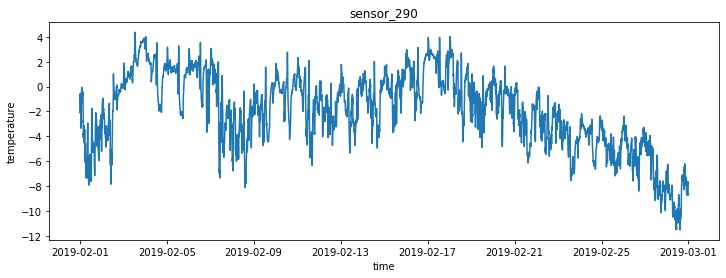

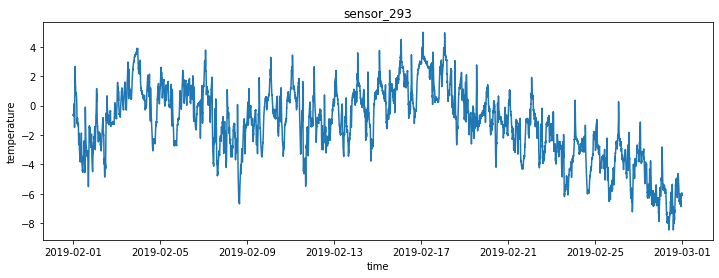

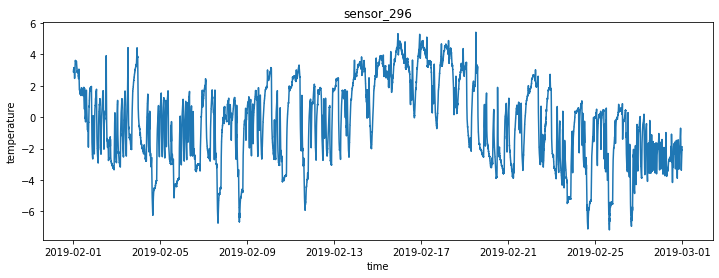

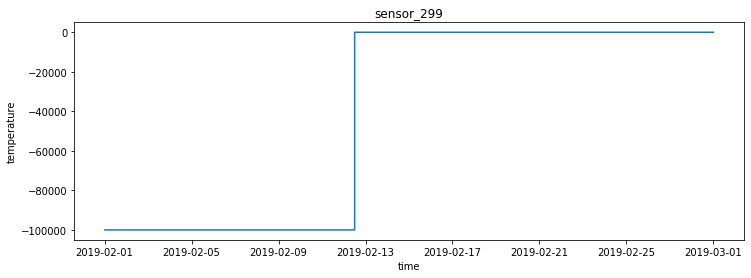

In [28]:
for _id in freezer_16_308['equip_sensor_id_y'].unique():
    plt.figure(_id, figsize=(12,4))
    plt.title(f'sensor_{_id}')
    plt.ylabel("temperature")
    plt.xlabel("time")
    plt.plot(freezer_16_308.loc[freezer_16_308['equip_sensor_id_y']==_id, 'gw_time_y'], freezer_16_308.loc[freezer_16_308['equip_sensor_id_y']==_id, 'temperature'])

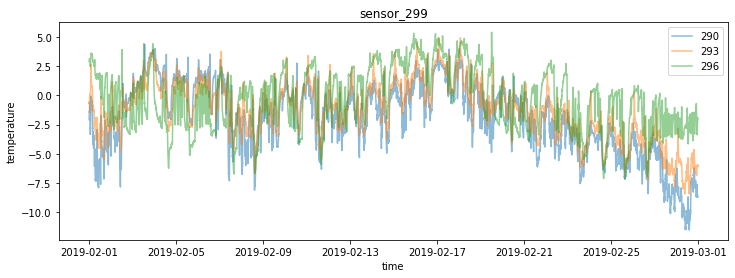

In [31]:
plt.figure(figsize=(12,4))
plt.title(f'sensor_{_id}')
plt.ylabel("temperature")
plt.xlabel("time")
for _id in freezer_16_308['equip_sensor_id_y'].unique():
    if _id != 299:
        plt.plot(freezer_16_308.loc[freezer_16_308['equip_sensor_id_y']==_id, 'gw_time_y'], freezer_16_308.loc[freezer_16_308['equip_sensor_id_y']==_id, 'temperature'], alpha=0.5, label=f'{_id}')
plt.legend()

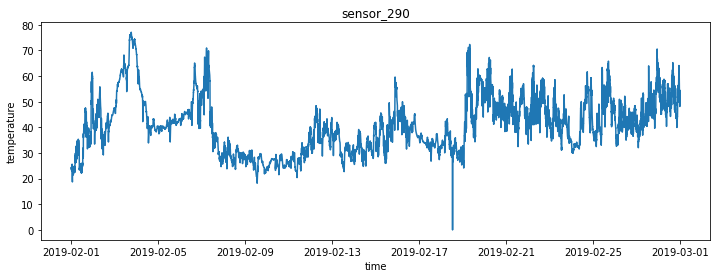

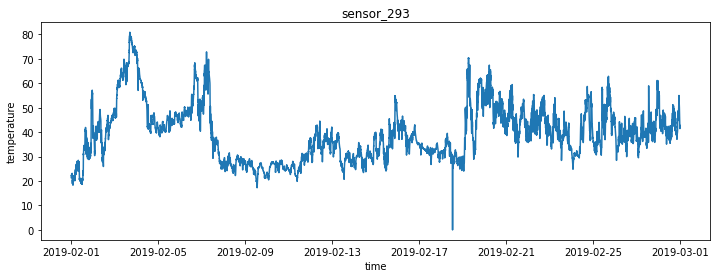

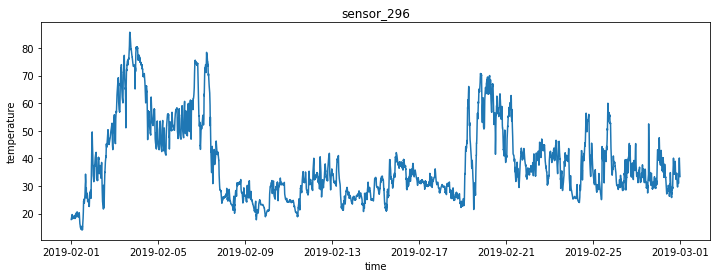

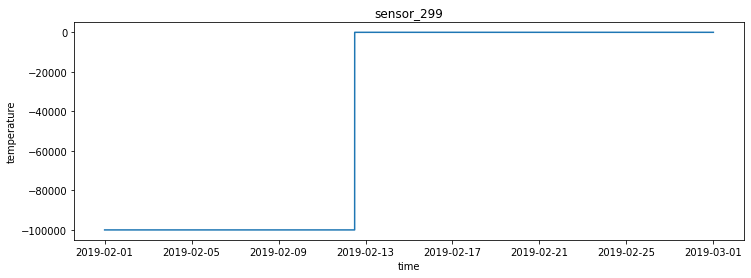

In [32]:
for _id in freezer_16_308['equip_sensor_id_y'].unique():
    plt.figure(_id, figsize=(12,4))
    plt.title(f'sensor_{_id}')
    plt.ylabel("temperature")
    plt.xlabel("time")
    plt.plot(freezer_16_308.loc[freezer_16_308['equip_sensor_id_y']==_id, 'gw_time_y'], freezer_16_308.loc[freezer_16_308['equip_sensor_id_y']==_id, 'humidity'])

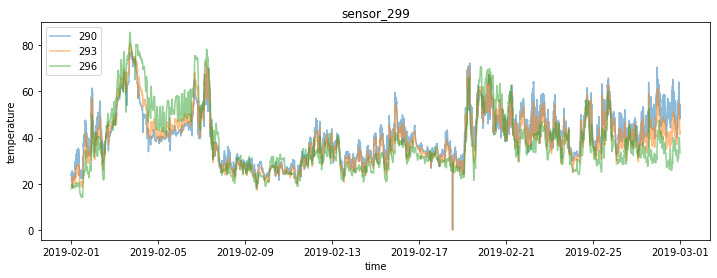

In [34]:
plt.figure(figsize=(12,4))
plt.title(f'sensor_{_id}')
plt.ylabel("temperature")
plt.xlabel("time")
for _id in freezer_16_308['equip_sensor_id_y'].unique():
    if _id != 299:
        plt.plot(freezer_16_308.loc[freezer_16_308['equip_sensor_id_y']==_id, 'gw_time_y'], freezer_16_308.loc[freezer_16_308['equip_sensor_id_y']==_id, 'humidity'], alpha=0.5, label=f'{_id}')
plt.legend()

In [37]:
sensor_16_290 = df[df['equip_sensor_id_y']==290]

In [38]:
sensor_16_290

,key,gw_time_x,gw_time_y,equip_sensor_id_x,status_x,fan_run,fan_trip,freez_run,freez_trip,defrost,...,equip_sensor_id_y,status_y,color_list,avg_temperature,avg_humidity,temperature,humidity,battery,available,insert_dt_y
0,0,2019-02-01 00:00:19,2019-02-01 00:00:22,308,1,1.0,0.0,0.0,0.0,0.0,...,290,0,"{""humidity"": ""green"", ""temperature"": ""red"", ""t...",0.06,21.06,-2.08,23.91,100,1,2019-02-01 00:00:22
4,1,2019-02-01 00:00:49,2019-02-01 00:00:52,308,1,1.0,0.0,0.0,0.0,0.0,...,290,0,"{""humidity"": ""green"", ""temperature"": ""red"", ""t...",0.07,21.12,-2.07,23.97,100,1,2019-02-01 00:00:53
8,2,2019-02-01 00:01:19,2019-02-01 00:01:23,308,1,1.0,0.0,0.0,0.0,0.0,...,290,0,"{""humidity"": ""green"", ""temperature"": ""red"", ""t...",0.08,21.16,-2.04,24.03,100,1,2019-02-01 00:01:23
12,3,2019-02-01 00:01:50,2019-02-01 00:01:53,308,1,1.0,0.0,0.0,0.0,0.0,...,290,0,"{""humidity"": ""green"", ""temperature"": ""red"", ""t...",0.08,21.19,-2.03,24.07,100,1,2019-02-01 00:01:53
16,4,2019-02-01 00:02:20,2019-02-01 00:02:23,308,1,1.0,0.0,0.0,0.0,0.0,...,290,0,"{""humidity"": ""green"", ""temperature"": ""red"", ""t...",0.09,21.21,-2.02,24.07,100,1,2019-02-01 00:02:23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317894,324390,2019-02-28 23:57:04,2019-02-28 23:57:32,326,1,1.0,0.0,0.0,0.0,0.0,...,290,1,"{""humidity"": ""green"", ""temperature"": ""green"", ...",-4.36,39.68,-8.68,50.69,100,1,2019-02-28 23:57:33
317898,324391,2019-02-28 23:57:35,2019-02-28 23:58:02,326,1,1.0,0.0,0.0,0.0,0.0,...,290,1,"{""humidity"": ""green"", ""temperature"": ""green"", ...",-4.35,39.70,-8.67,50.74,100,1,2019-02-28 23:58:03
317902,324392,2019-02-28 23:58:05,2019-02-28 23:58:33,326,1,1.0,0.0,0.0,0.0,0.0,...,290,1,"{""humidity"": ""green"", ""temperature"": ""green"", ...",-4.34,39.69,-8.66,50.67,100,1,2019-02-28 23:58:33
317906,324393,2019-02-28 23:58:35,2019-02-28 23:59:03,326,1,1.0,0.0,0.0,0.0,0.0,...,290,1,"{""humidity"": ""green"", ""temperature"": ""green"", ...",-4.33,39.68,-8.66,50.71,100,1,2019-02-28 23:59:03


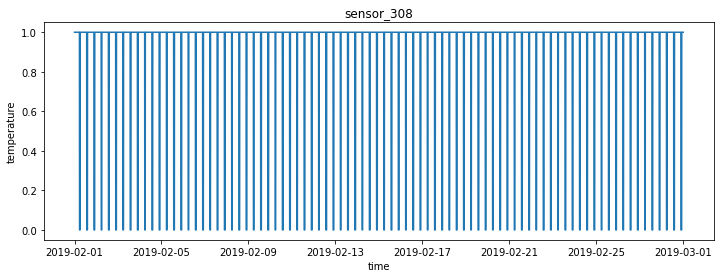

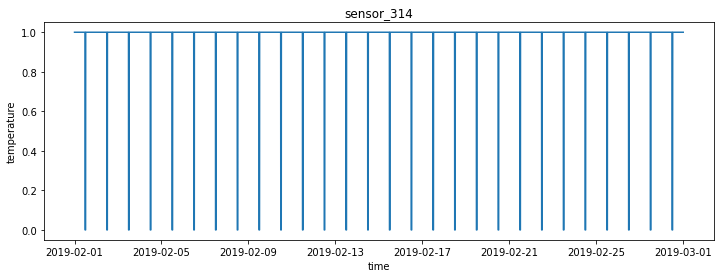

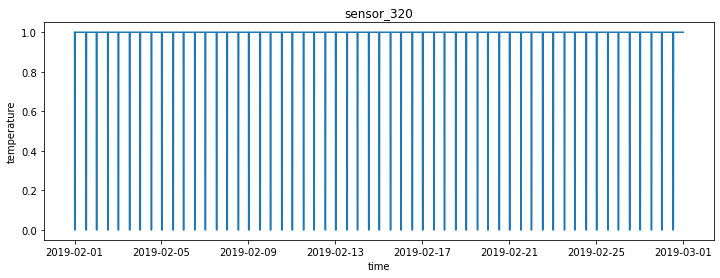

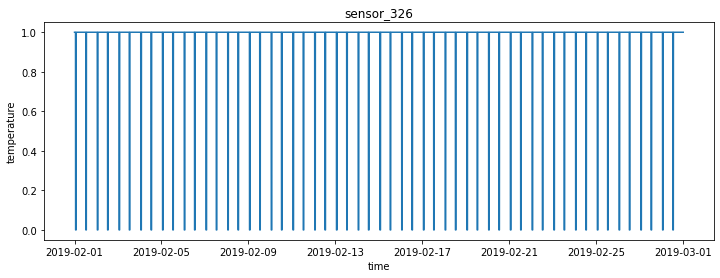

In [40]:
for _id in sensor_16_290['equip_sensor_id_x'].unique():
    plt.figure(_id, figsize=(12,4))
    plt.title(f'sensor_{_id}')
    plt.ylabel("temperature")
    plt.xlabel("time")
    plt.plot(sensor_16_290.loc[sensor_16_290['equip_sensor_id_x']==_id, 'gw_time_x'], sensor_16_290.loc[sensor_16_290['equip_sensor_id_x']==_id, 'fan_run'])